# U5: Ejemplo de ritmo cardiaco

In [1]:
#!pip install heartpy

## 1. Clean ECG signals

In [2]:
import heartpy as hp
import matplotlib.pyplot as plt

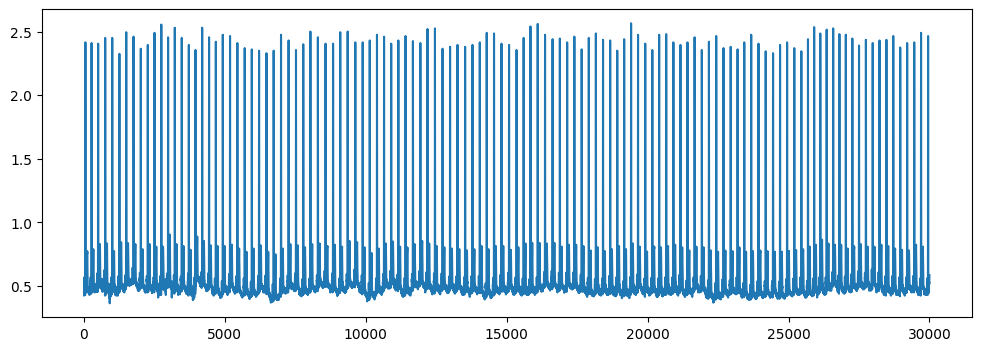

In [3]:
data = hp.get_data('ecg/e0103.csv')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

bpm: 59.697000
ibi: 1005.075630
sdnn: 45.612021
sdsd: 17.278462
rmssd: 30.487563
pnn20: 0.483051
pnn50: 0.118644
hr_mad: 28.000000
sd1: 21.545153
sd2: 59.911382
s: 4055.167506
sd1/sd2: 0.359617
breathingrate: 0.166667


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

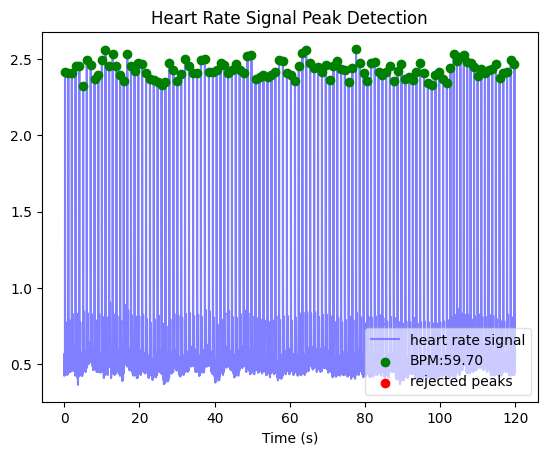

In [4]:
sample_rate = 250

#run analysis
wd, m = hp.process(data, sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

### Filtering

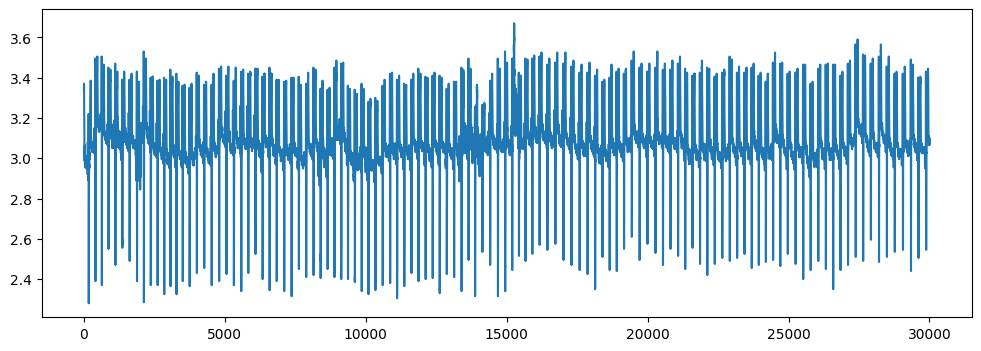

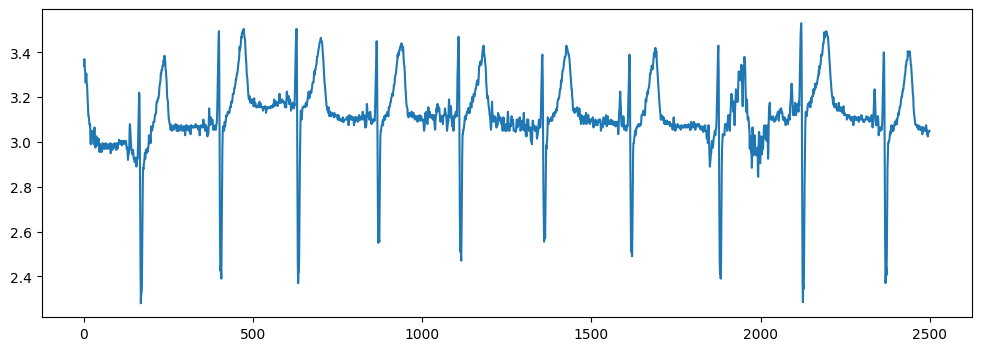

In [5]:
data = hp.get_data('ecg/e0110.csv')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500])
plt.show()

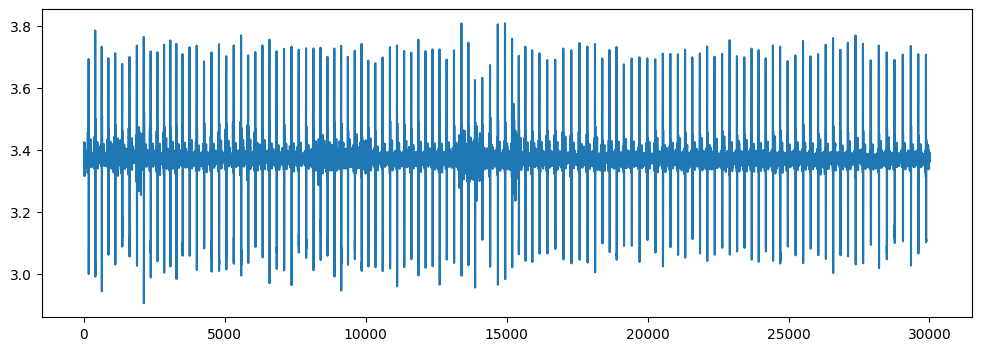

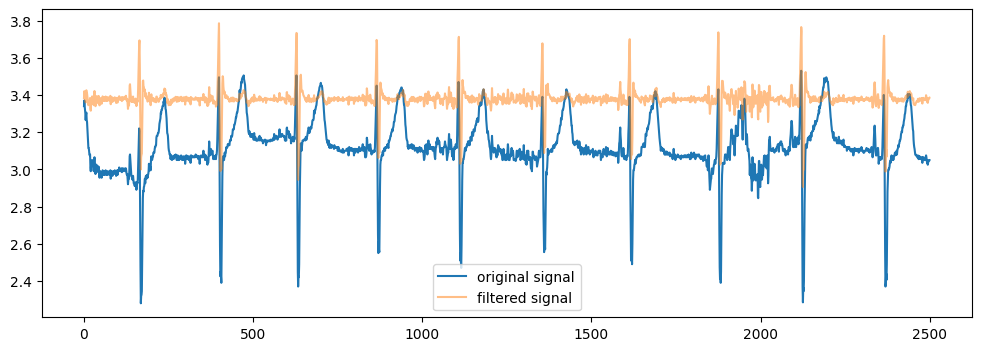

In [6]:
filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')

#visualize again
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()

bpm: 57.843015
ibi: 1037.290323
sdnn: 60.906871
sdsd: 20.513036
rmssd: 33.059617
pnn20: 0.493827
pnn50: 0.135802
hr_mad: 36.000000
sd1: 23.285718
sd2: 84.305770
s: 6167.324586
sd1/sd2: 0.276206
breathingrate: 0.133333


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

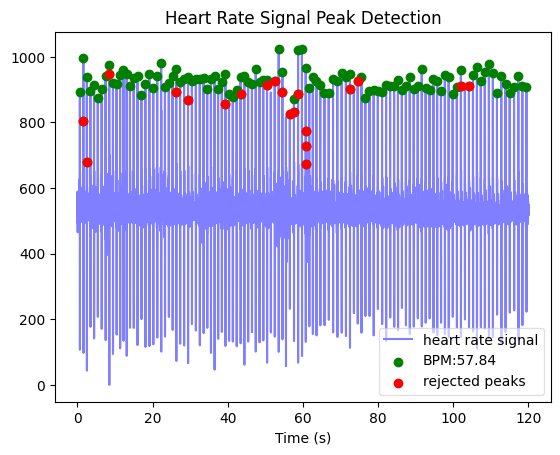

In [7]:
#run analysis
wd, m = hp.process(hp.scale_data(filtered), sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

### Resampling

bpm: 58.018220
ibi: 1034.157895
sdnn: 59.536305
sdsd: 21.549303
rmssd: 34.825073
pnn20: 0.544643
pnn50: 0.133929
hr_mad: 35.000000
sd1: 24.588644
sd2: 80.051446
s: 6183.774312
sd1/sd2: 0.307161
breathingrate: 0.166667


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

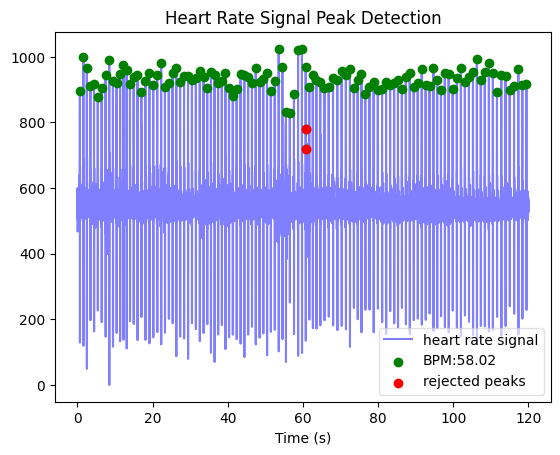

In [8]:
from scipy.signal import resample

#resample the data. Usually 2, 4, or 6 times is enough depending on original sampling rate
resampled_data = resample(filtered, len(filtered) * 2)

#And run the analysis again. Don't forget to up the sample rate as well!
wd, m = hp.process(hp.scale_data(resampled_data), sample_rate * 2)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

## 2. Moving to PPG signals

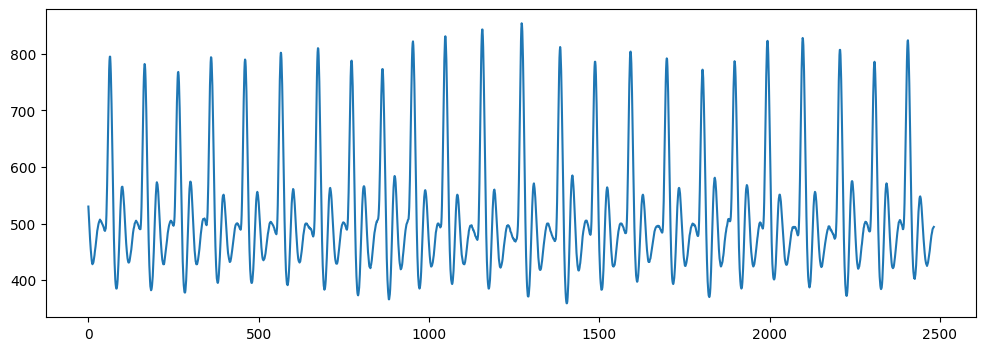

In [9]:
#first let's load the clean PPG signal
data, timer = hp.load_exampledata(0)

#and visualise
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

In [10]:
#run the analysis
wd, m = hp.process(data, sample_rate = 100.0)

bpm: 58.898848
ibi: 1018.695652
sdnn: 65.760061
sdsd: 34.866925
rmssd: 64.737231
pnn20: 0.863636
pnn50: 0.409091
hr_mad: 40.000000
sd1: 45.758077
sd2: 82.926832
s: 11921.000816
sd1/sd2: 0.551789
breathingrate: 0.170721


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

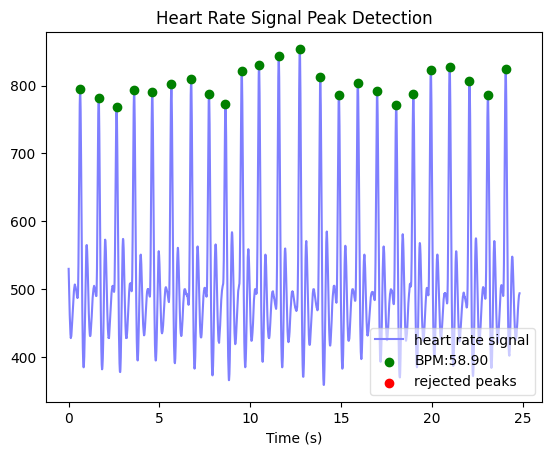

In [11]:
#set large figure
plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

### Not clean case

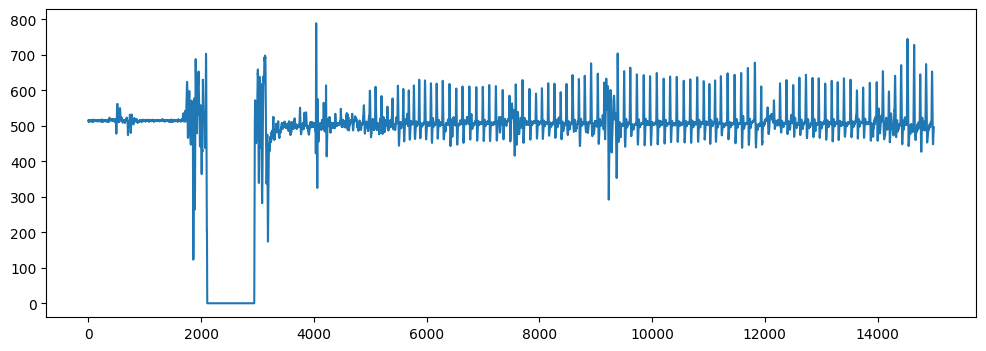

In [12]:
data, timer = hp.load_exampledata(1)

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

bpm: 62.376304
ibi: 961.903744
sdnn: 64.613519
sdsd: 29.871930
rmssd: 57.069746
pnn20: 0.797297
pnn50: 0.486486
hr_mad: 47.010333
sd1: 40.344402
sd2: 81.621935
s: 10345.227446
sd1/sd2: 0.494284
breathingrate: 0.266667


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

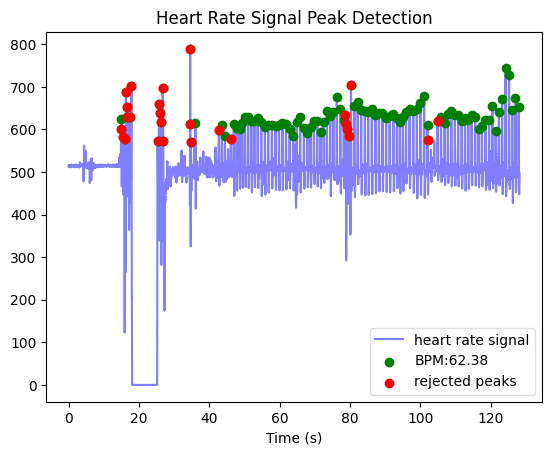

In [13]:
sample_rate = hp.get_samplerate_mstimer(timer)

wd, m = hp.process(data, sample_rate)

#plot
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

## 3. The wild case (PPG from smartwach)

In [14]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv('ecg/raw_ppg.csv')
df.keys()

Index(['ppg', 'timer'], dtype='object')

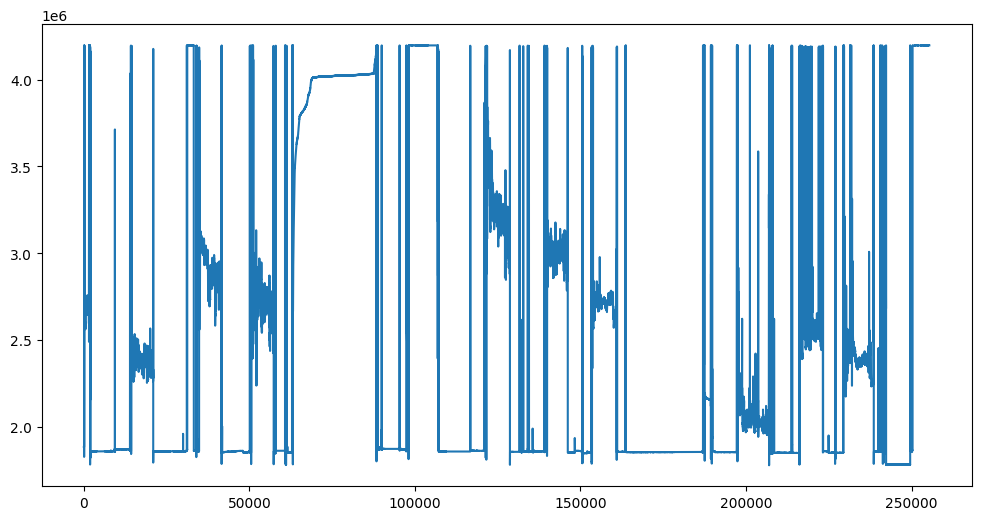

In [16]:
#exploring data
plt.figure(figsize=(12,6))

plt.plot(df['ppg'].values)
plt.show()

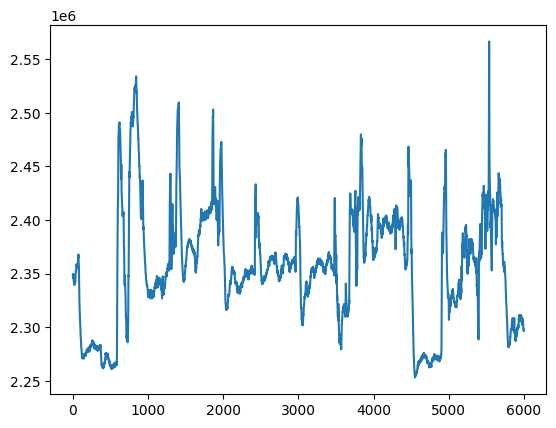

In [17]:
#just analyze a short piece
signal = df['ppg'].values[14500:20500]
timer = df['timer'].values[14500:20500]
plt.plot(signal)
plt.show()

In [18]:
#estimate sampling rate
sample_rate = hp.get_samplerate_datetime(timer, timeformat = '%H:%M:%S.%f')
print('sampling rate is: %.3f Hz' %sample_rate)

sampling rate is: 9.986 Hz


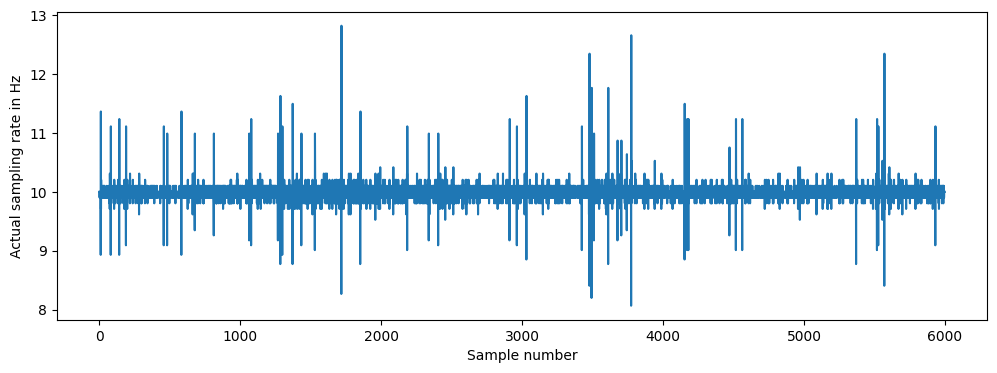

mean sampling rate: 9.987
median sampling rate: 10.000
standard deviation: 0.183


In [19]:
from datetime import datetime

#let's create a list 'newtimer' to house our datetime objects
newtimer = [datetime.strptime(x, '%H:%M:%S.%f') for x in timer]

#let's compute the real distances from entry to entry
elapsed = []
for i in range(len(newtimer) - 1):
    elapsed.append(1 / ((newtimer[i+1] - newtimer[i]).microseconds / 1000000))

#and plot the results
plt.figure(figsize=(12,4))
plt.plot(elapsed)
plt.xlabel('Sample number')
plt.ylabel('Actual sampling rate in Hz')
plt.show()

print('mean sampling rate: %.3f' %np.mean(elapsed))
print('median sampling rate: %.3f'%np.median(elapsed))
print('standard deviation: %.3f'%np.std(elapsed))

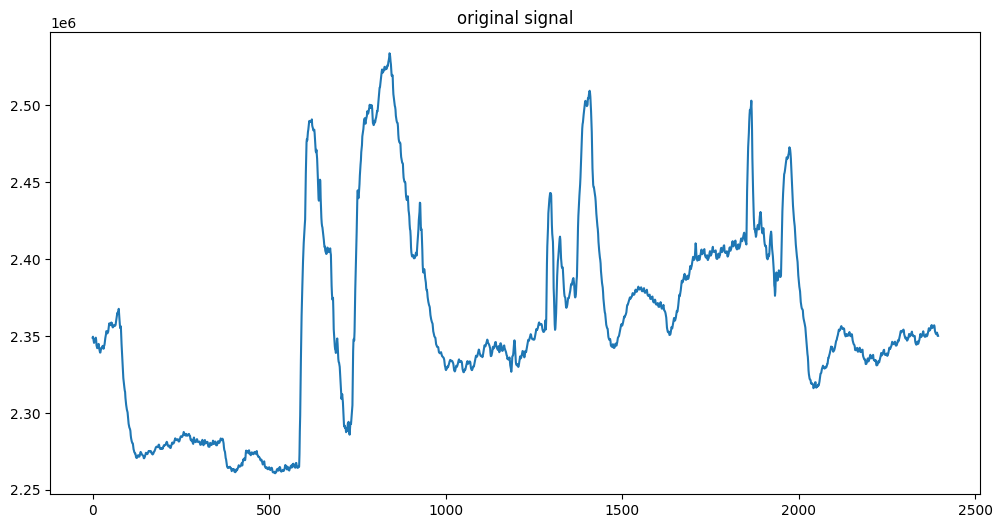

In [20]:
#Let's plot 4 min of the segment to get a view of what we're working with
plt.figure(figsize=(12,6))
plt.plot(signal[0:int(240 * sample_rate)])
plt.title('original signal')
plt.show()

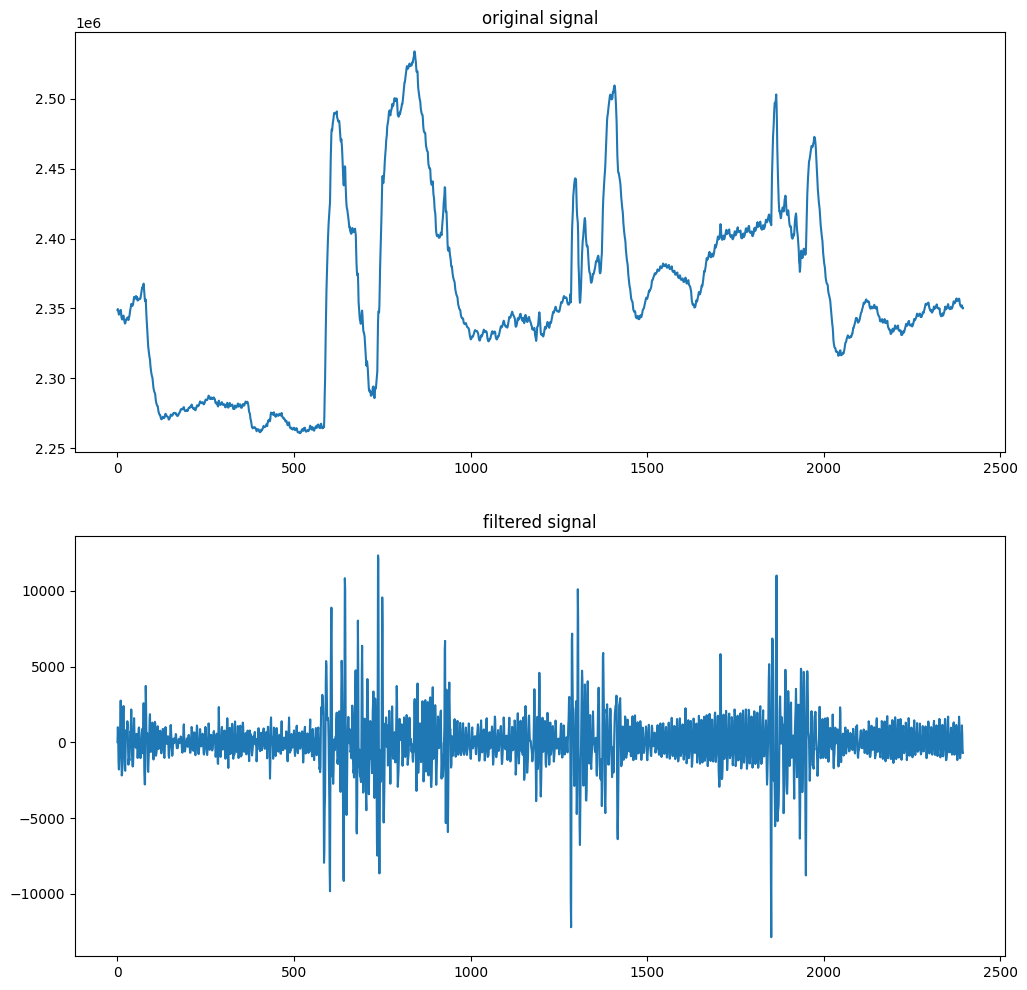

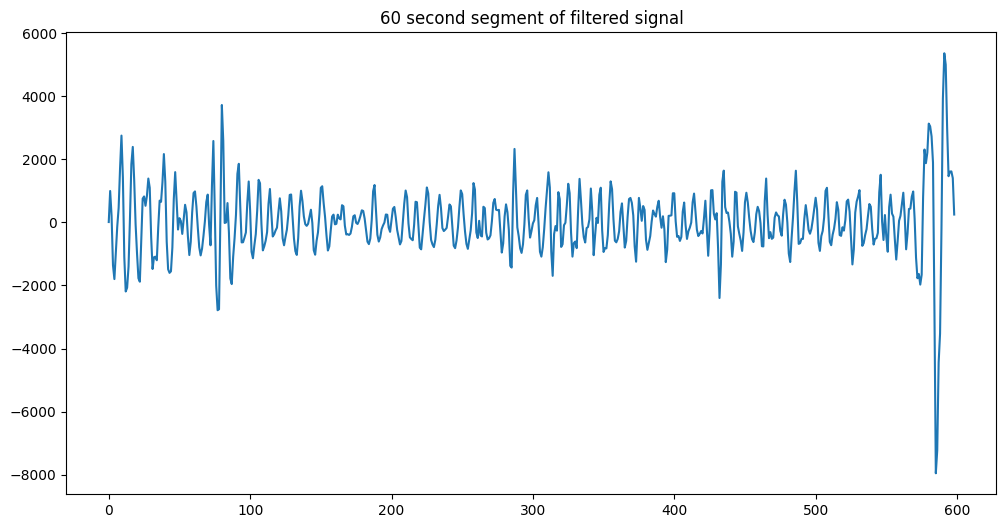

In [21]:
#Let's run it through a standard butterworth bandpass implementation to remove everything < 0.8 and > 3.5 Hz.
filtered = hp.filter_signal(signal, [0.7, 3.5], sample_rate=sample_rate, 
                            order=3, filtertype='bandpass')

#let's plot first 240 seconds and work with that!
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(signal[0:int(240 * sample_rate)])
plt.title('original signal')
plt.subplot(212)
plt.plot(filtered[0:int(240 * sample_rate)])
plt.title('filtered signal')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(filtered[0:int(sample_rate * 60)])
plt.title('60 second segment of filtered signal')
plt.show()

In [22]:
#let's resample to ~100Hz as well
#10Hz is low for the adaptive threshold analysis HeartPy uses
from scipy.signal import resample

resampled = resample(filtered, len(filtered) * 10)

#don't forget to compute the new sampling rate
new_sample_rate = sample_rate * 10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


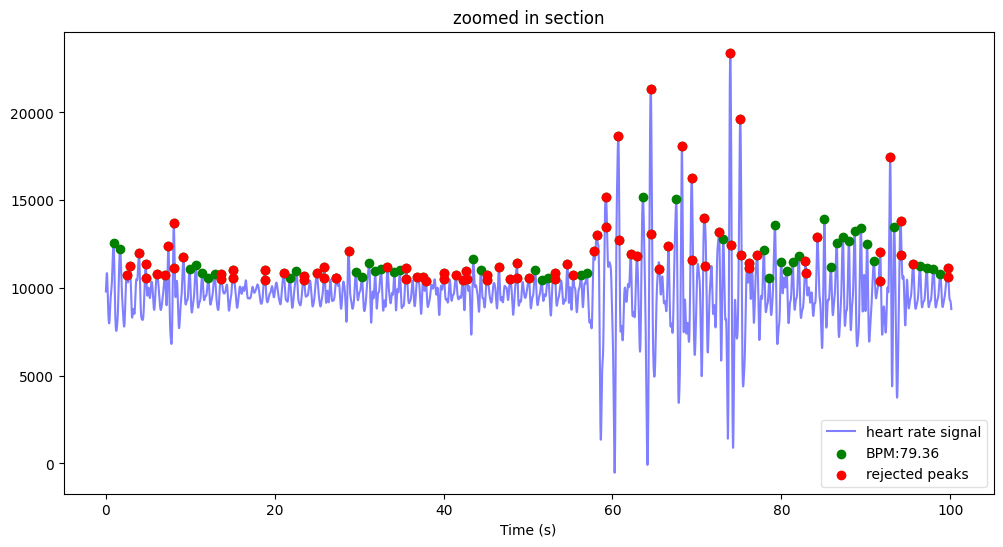

bpm: 79.359496
ibi: 756.053189
sdnn: 64.994392
sdsd: 47.662905
rmssd: 75.816447
pnn20: 0.687500
pnn50: 0.562500
hr_mad: 38.056933
sd1: 52.474660
sd2: 61.238831
s: 10095.466648
sd1/sd2: 0.856885
breathingrate: 0.166667


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


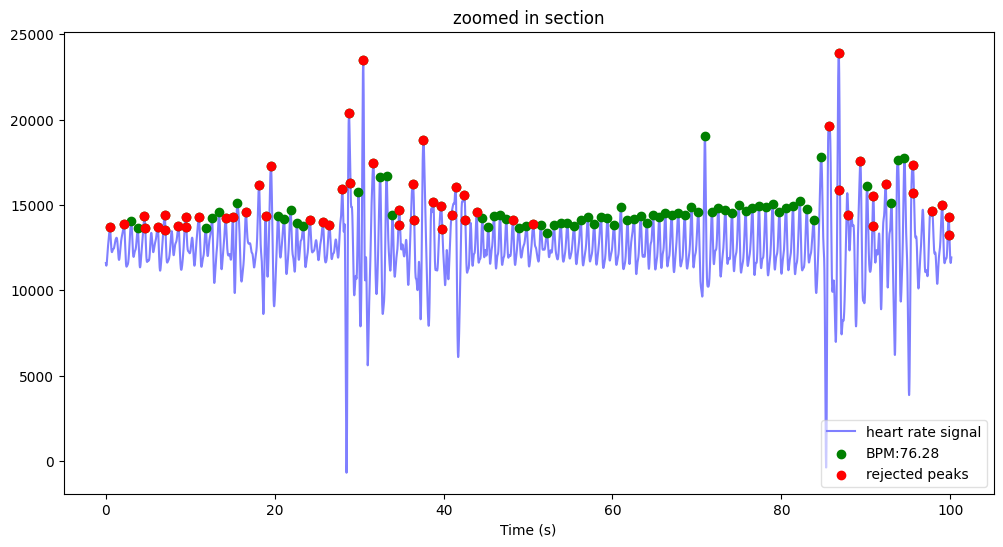

bpm: 76.276784
ibi: 786.608936
sdnn: 64.426442
sdsd: 33.842026
rmssd: 52.451344
pnn20: 0.706897
pnn50: 0.258621
hr_mad: 25.028467
sd1: 36.269742
sd2: 57.296852
s: 6528.675837
sd1/sd2: 0.633015
breathingrate: 0.233333


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


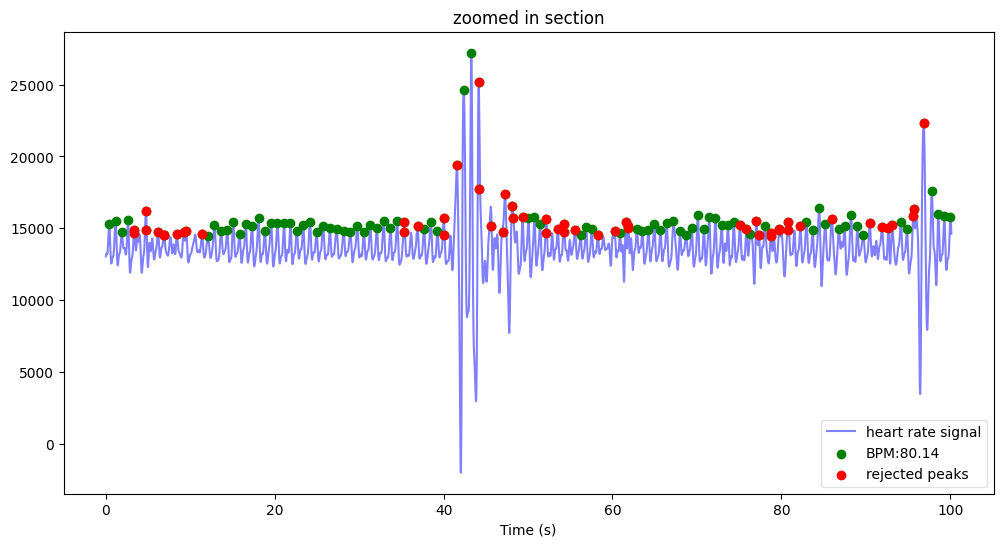

bpm: 80.140527
ibi: 748.684870
sdnn: 47.606192
sdsd: 21.648073
rmssd: 37.633326
pnn20: 0.646154
pnn50: 0.184615
hr_mad: 27.042700
sd1: 26.454880
sd2: 57.468399
s: 4776.224835
sd1/sd2: 0.460338
breathingrate: 0.200000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


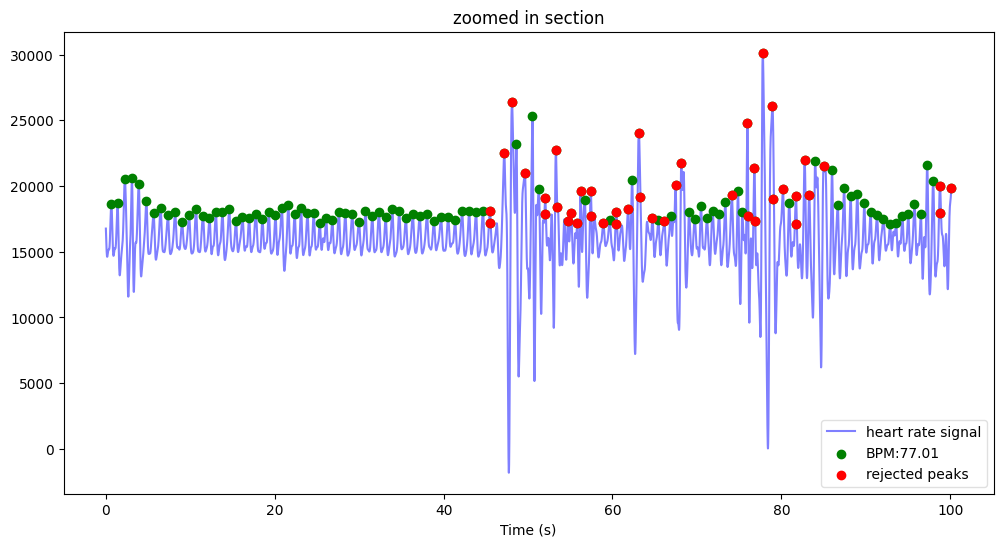

bpm: 77.007966
ibi: 779.140179
sdnn: 67.149279
sdsd: 26.025919
rmssd: 40.921120
pnn20: 0.620253
pnn50: 0.151899
hr_mad: 35.549817
sd1: 28.690814
sd2: 67.970221
s: 6126.485560
sd1/sd2: 0.422109
breathingrate: 0.266667


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


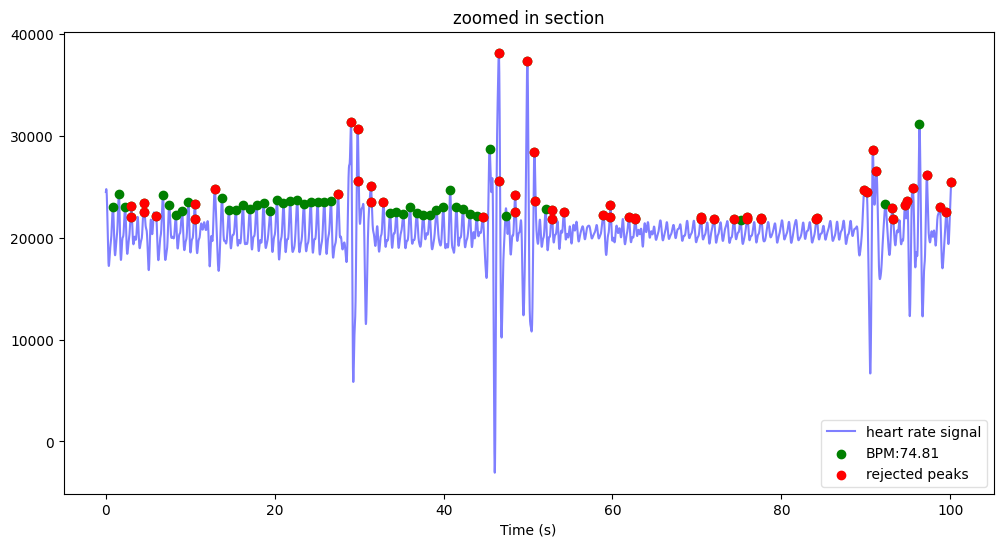

bpm: 74.808472
ibi: 802.048196
sdnn: 72.275896
sdsd: 19.707483
rmssd: 32.333149
pnn20: 0.514286
pnn50: 0.085714
hr_mad: 23.028467
sd1: 22.852642
sd2: 37.011862
s: 2657.218189
sd1/sd2: 0.617441
breathingrate: 0.266667


In [23]:
#run HeartPy over a few segments, fingers crossed, and plot results of each
for s in [[0, 10000], [10000, 20000], [20000, 30000], [30000, 40000], [40000, 50000]]:
    wd, m = hp.process(resampled[s[0]:s[1]], sample_rate = new_sample_rate, 
                       high_precision=True, clean_rr=True)
    hp.plotter(wd, m, title = 'zoomed in section', figsize=(12,6))
    plt.show()
    for measure in m.keys():
        print('%s: %f' %(measure, m[measure]))

### In depth processing

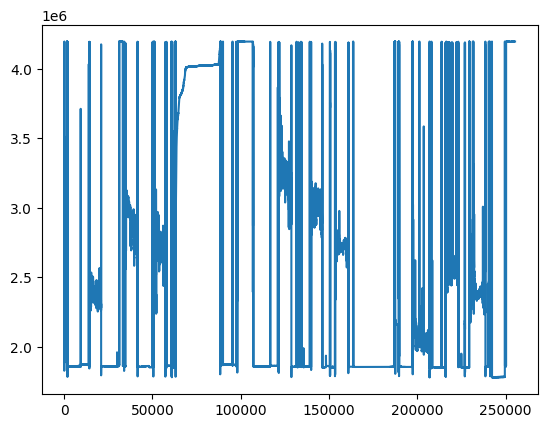

In [24]:
raw = df['ppg'].values

plt.plot(raw)
plt.show()

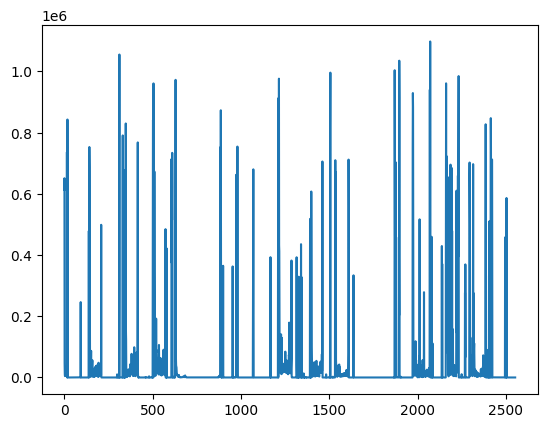

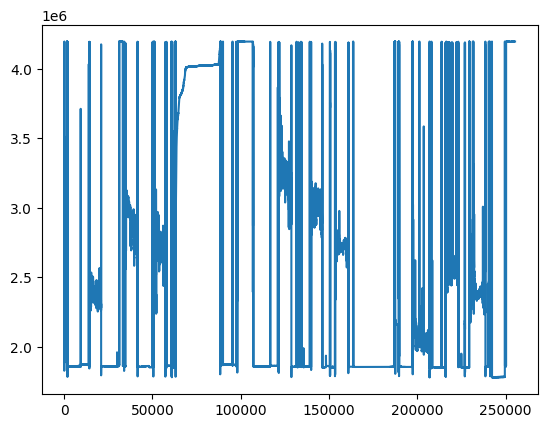

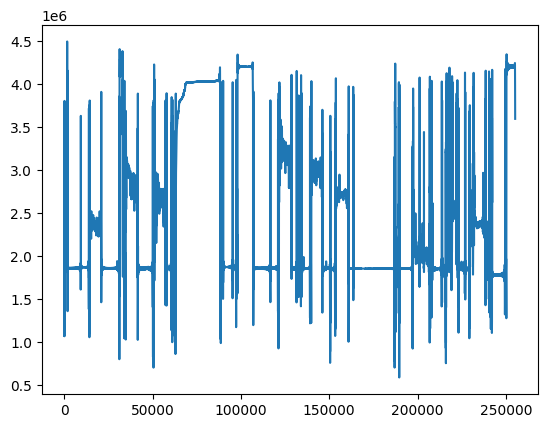

In [25]:
import sys
from scipy.signal import resample

windowsize = 100
std = []

for i in range(len(raw) // windowsize):
    start = i * windowsize
    end = (i + 1) * windowsize
    sliced = raw[start:end]
    try:
        std.append(np.std(sliced))
    except:
        print(i)
    
plt.plot(std)
plt.show()

plt.plot(raw)
plt.show()

plt.plot(raw[0:(len(raw) // windowsize) * windowsize] - resample(std, len(std)*windowsize))
plt.show()

In [26]:
(len(raw) // windowsize) * windowsize

255300

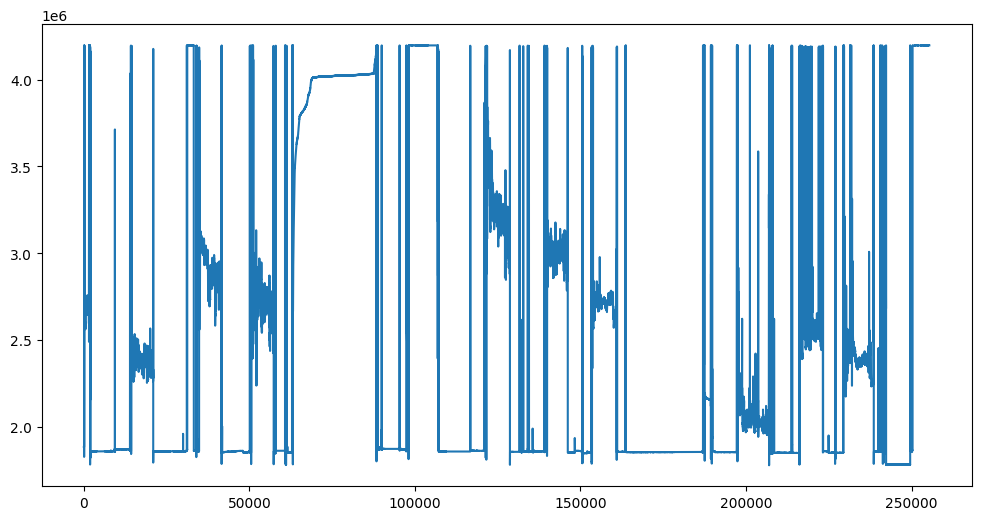

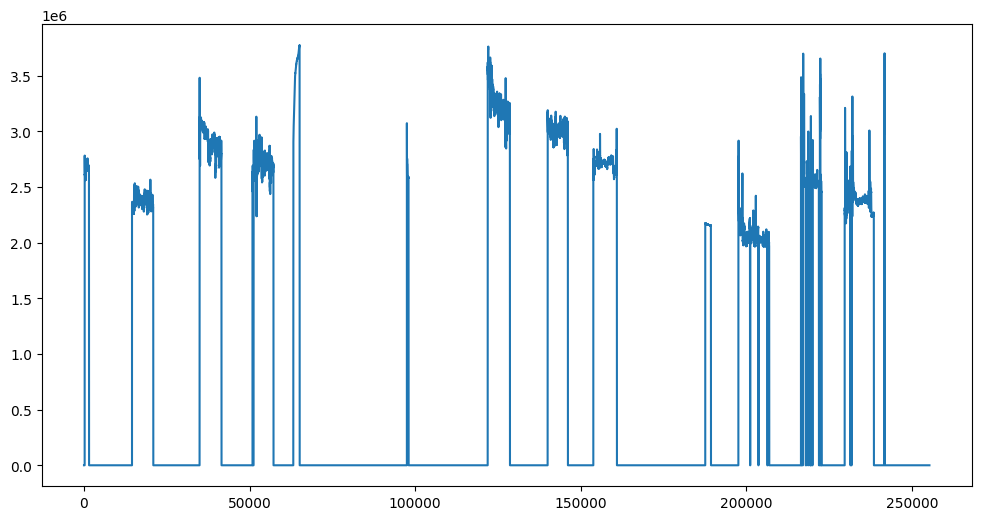

In [27]:
mx = np.max(raw)
mn = np.min(raw)
global_range = mx - mn

windowsize = 100
filtered = []

for i in range(len(raw) // windowsize):
    start = i * windowsize
    end = (i + 1) * windowsize
    sliced = raw[start:end]
    rng = np.max(sliced) - np.min(sliced)
    
    if ((rng >= (0.5 * global_range)) 
        or 
        (np.max(sliced) >= 0.9 * mx) 
        or 
        (np.min(sliced) <= mn + (0.1 * mn))):
        
        for x in sliced:
            filtered.append(0)
    else:
        for x in sliced:
            filtered.append(x)
   
plt.figure(figsize=(12,6))
plt.plot(raw)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(filtered)
plt.show()